## **Creating Models with `torch.nn`**

The `torch.nn` module provides a flexible way to define and train neural networks. In this section, we will cover:
- Subclassing `nn.Module`
- Understanding `__init__` and `forward`
- Using the model for inference
- Model attributes and methods
- Exploring other useful classes in `torch.nn`

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [11]:
class Linear:
    def __init__(self, input_size: int, output_size: int):
        self.input_size = input_size
        self.output_size = output_size

        self.weight = torch.randn(input_size, output_size, requires_grad=True) # weight
        self.bias = torch.randn(output_size, requires_grad=True) # bias

    def __call__(self, x):
        return x @ self.weight + self.bias

In [21]:
x = torch.randn(32, 3)
y = torch.randn(32)

In [27]:
nn.Module

torch.nn.modules.module.Module

In [31]:
lin1 = nn.Linear(3, 4)
for param in lin1.parameters():
    print(param)

Parameter containing:
tensor([[ 0.3128,  0.1561,  0.4977],
        [-0.4398,  0.1624, -0.3040],
        [ 0.4523, -0.3243, -0.3101],
        [ 0.2771, -0.2547,  0.1391]], requires_grad=True)
Parameter containing:
tensor([ 0.3132,  0.1967, -0.4062, -0.0225], requires_grad=True)


In [53]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__() # This is required
        self.lin1 = nn.Linear(8, 4)
        self.lin2 = nn.Linear(4, 5)
        self.lin3 = nn.Linear(5, 3)
        self.lin4 = nn.Linear(3, 1)

    def forward(self, x):
        x = torch.relu(self.lin1(x)) # first hidden layer
        x = torch.relu(self.lin2(x)) # second hidden layer
        x = torch.relu(self.lin3(x)) # third hidden layer
        x = self.lin4(x) # output
        return x

In [54]:
calc_loss = nn.MSELoss()

In [55]:
class SGD:
    def __init__(self, parameters, lr = 0.001):
        self.parameters = parameters
        self.lr = lr

    def zero_grad(self):
        for param in self.parameters:
            param.grad = None

    def step(self):
        for param in self.parameters:
            param.data -= param.grad * self.lr

In [56]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = torch.tensor(housing.data, dtype=torch.float32)
Y = torch.tensor(housing.target, dtype=torch.float32)

In [9]:
import matplotlib.pyplot as plt

In [62]:
# hyperparameters
batch_size = 100
lr = 0.0001
epochs = 10

lossi = []

model = MyModel() # model
calc_loss = nn.MSELoss() # loss calculator
optimizer = optim.SGD(model.parameters(), lr=0.00001) # optimizer

# training loop
for i in range(500):
    y_pred = model(X) # forward pass
    loss = calc_loss(Y, y_pred.squeeze()) # calculate loss
    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step() # update parameters

    lossi.append(loss.item())

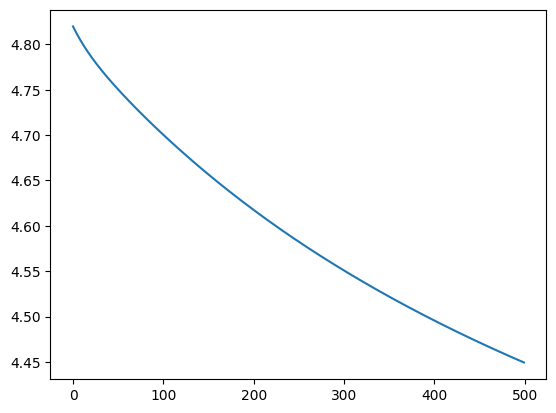

In [63]:
plt.plot(lossi);

In [64]:
Y

tensor([4.5260, 3.5850, 3.5210,  ..., 0.9230, 0.8470, 0.8940])

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X = torch.tensor(mnist.data, dtype=torch.float32)
Y = torch.tensor(mnist.target.astype(int), dtype=torch.long)

In [4]:
X.shape

torch.Size([70000, 784])

In [5]:
class DigitRecognizer(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.relu2(self.fc2(x))
        return self.fc3(x)

In [7]:
model = DigitRecognizer()
optimizer = optim.AdamW(model.parameters())
loss = nn.CrossEntropyLoss()
batch_size = 512

lossi = []

for epoch in range(10):
    model.train()
    for ix in range(0, X.shape[0] // batch_size+1):
        x = X[ix*batch_size: (ix+1)*batch_size]
        y = Y[ix*batch_size: (ix+1)*batch_size]
        y_pred = model(x) # training
        e = loss(y_pred, y)
        optimizer.zero_grad()
        e.backward()
        optimizer.step()
        lossi.append(e.item())
        print(e.item())

    model.eval()

    print(epoch)

13.975327491760254
33.88453674316406
41.25605010986328
34.94257736206055
34.692073822021484
23.907861709594727
17.16908073425293
13.430001258850098
7.234318733215332
5.717130184173584
3.098489999771118
1.7271219491958618
1.4034554958343506
1.4907323122024536
1.1895393133163452
1.2771165370941162
1.2725235223770142
1.2243229150772095
0.9202433228492737
0.7089358568191528
0.742251455783844
0.6281055808067322
0.7563559412956238
0.7256790995597839
0.763565719127655
0.644403338432312
0.5132911801338196
0.611086368560791
0.6742706298828125
0.44171103835105896
0.4757654070854187
0.4591729938983917
0.43145811557769775
0.4372059106826782
0.4852425754070282
0.3224197328090668
0.3165295124053955
0.28448745608329773
0.3091929256916046
0.3405647277832031
0.43571043014526367
0.3294295370578766
0.27417340874671936
0.3829207420349121
0.3872017562389374
0.23452647030353546
0.30251622200012207
0.26982513070106506
0.26910400390625
0.26821067929267883
0.262249618768692
0.2978256046772003
0.307130992412567

KeyboardInterrupt: 

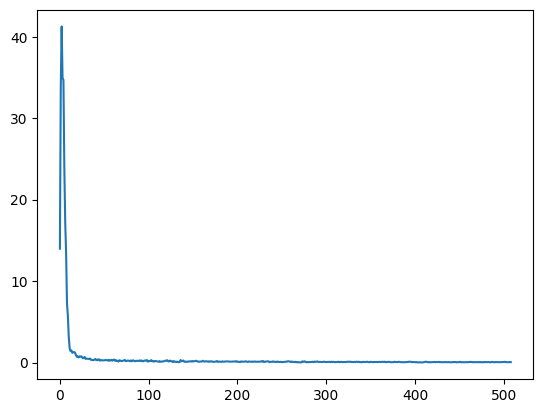

In [10]:
plt.plot(lossi)
plt.show()

In [16]:
@torch.no_grad()
def predict(x):
    y_logit = model(x) # inference
    y_prob = torch.softmax(y_logit, dim=1)
    return y_prob.argmax(dim=1)

In [ ]:
def predict(x):
    with torch.no_grad():
        y_logit = model(x) # inference
    y_prob = torch.softmax(y_logit, dim=1)
    return y_prob.argmax(dim=1)

In [17]:
predict(X[:10])

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [15]:
Y[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [18]:
model.train()

DigitRecognizer(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)

In [19]:
model.eval()

DigitRecognizer(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)

In [20]:
torch.save(model.state_dict(), 'digit_recognizer.pth')

In [22]:
model2 = DigitRecognizer()
model2.load_state_dict(torch.load('digit_recognizer.pth', weights_only=True))

<All keys matched successfully>

## FashionMNIST is homework